In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [19]:
# Load the heights-weights dataset
hw = pd.read_csv('Height_Weight.csv')

hw.head(10)

,Height,Weight
0,121.92,28.0
1,124.46,28.1
2,127.00,28.2
3,129.54,28.3
4,132.08,28.4
5,134.62,28.5
6,137.16,35.2
7,139.70,37.6
8,142.24,40.0
9,144.78,42.6


In [21]:
hw.tail(4)

,Height,Weight
31,200.66,97.5
32,203.20,99.8
33,205.00,102.5
34,208.00,104.8


In [22]:
hw.shape

(35, 2)

In [23]:
# Split the data into training/testing sets
hw_X_train = hw.Height[0:30]
hw_X_test = hw.Height[30:34]

# Split the targets into training/testing sets
hw_Y_train = hw.Weight[0:30]
hw_Y_test = hw.Weight[30:34]

print(hw_X_test)
print(hw_Y_test)

30    198.12
31    200.66
32    203.20
33    205.00
Name: Height, dtype: float64
30     94.8
31     97.5
32     99.8
33    102.5
Name: Weight, dtype: float64


In [24]:
# Reshape
hw_X_train = np.array(hw.Height[0:30]).reshape(-1,1)
hw_X_test = np.array(hw.Height[30:34]).reshape(-1,1)
hw_Y_train = np.array(hw.Weight[0:30]).reshape(-1,1)
hw_Y_test = np.array(hw.Weight[30:34]).reshape(-1,1)

hw_X_test, hw_Y_test

(array([[198.12],
        [200.66],
        [203.2 ],
        [205.  ]]), array([[ 94.8],
        [ 97.5],
        [ 99.8],
        [102.5]]))

In [25]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [26]:
# Train the model using the training sets
regr.fit(hw_X_train,hw_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# Make predictions using the testing set
hw_Y_pred = regr.predict(hw_X_test)

In [28]:
print("Predicted: ", hw_Y_pred)
print("True Labels: ", hw_Y_test)

Predicted:  [[ 94.01655172]
 [ 96.42858732]
 [ 98.84062291]
 [100.54993948]]
True Labels:  [[ 94.8]
 [ 97.5]
 [ 99.8]
 [102.5]]


In [32]:
#Let's Predict
print(regr.predict(np.array([208]).reshape(-1,1)))

print(hw.Weight[34])


[[103.39880042]]
104.8


In [33]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# Intercept
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[0.94962031]]
Intercept: 
 [-94.12222469]


In [29]:
#Our Remaining Value
hw.tail(1)

,Height,Weight
34,208.0,104.8


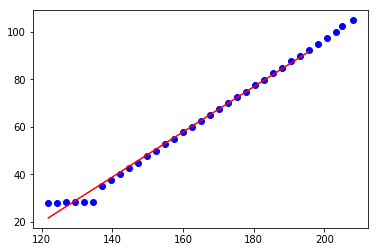

In [34]:
#Plotting Regression Line Against True Labels
plt.scatter(hw.Height, hw.Weight,  color='blue')
plt.plot(hw_X_train, regr.coef_[0][0]*hw_X_train + regr.intercept_[0], '-r')
plt.show()

In [35]:
#Evaluate Model

# The mean squared error

print("Mean squared error (Test Dataset): %.2f" %mean_squared_error(hw_Y_test,hw_Y_pred))

Mean squared error (Test Dataset): 1.62
